# 第一个note

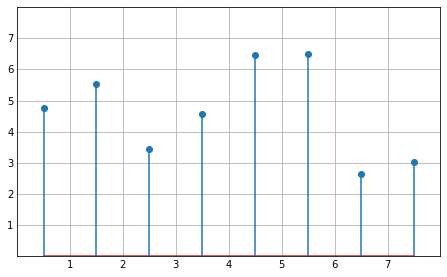

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
np.random.seed(3)
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.stem(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

$a^2+b^2=c^2$

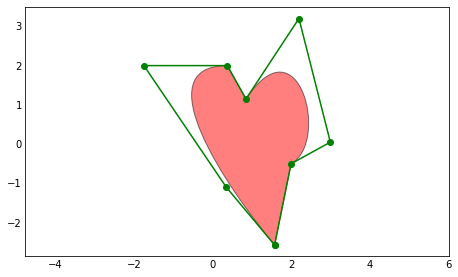

In [2]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

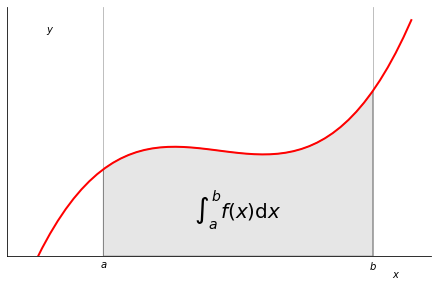

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
        horizontalalignment='center', fontsize=20)

fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks([a, b], labels=['$a$', '$b$'])
ax.set_yticks([])

plt.show()

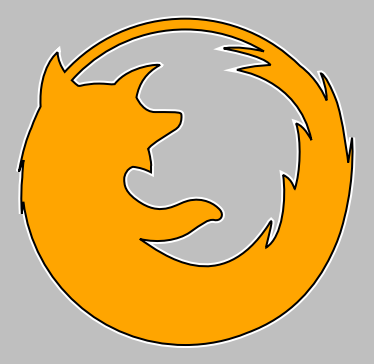

In [4]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# From: https://dmitrybaranovskiy.github.io/raphael/icons/#firefox
firefox = "M28.4,22.469c0.479-0.964,0.851-1.991,1.095-3.066c0.953-3.661,0.666-6.854,0.666-6.854l-0.327,2.104c0,0-0.469-3.896-1.044-5.353c-0.881-2.231-1.273-2.214-1.274-2.21c0.542,1.379,0.494,2.169,0.483,2.288c-0.01-0.016-0.019-0.032-0.027-0.047c-0.131-0.324-0.797-1.819-2.225-2.878c-2.502-2.481-5.943-4.014-9.745-4.015c-4.056,0-7.705,1.745-10.238,4.525C5.444,6.5,5.183,5.938,5.159,5.317c0,0-0.002,0.002-0.006,0.005c0-0.011-0.003-0.021-0.003-0.031c0,0-1.61,1.247-1.436,4.612c-0.299,0.574-0.56,1.172-0.777,1.791c-0.375,0.817-0.75,2.004-1.059,3.746c0,0,0.133-0.422,0.399-0.988c-0.064,0.482-0.103,0.971-0.116,1.467c-0.09,0.845-0.118,1.865-0.039,3.088c0,0,0.032-0.406,0.136-1.021c0.834,6.854,6.667,12.165,13.743,12.165l0,0c1.86,0,3.636-0.37,5.256-1.036C24.938,27.771,27.116,25.196,28.4,22.469zM16.002,3.356c2.446,0,4.73,0.68,6.68,1.86c-2.274-0.528-3.433-0.261-3.423-0.248c0.013,0.015,3.384,0.589,3.981,1.411c0,0-1.431,0-2.856,0.41c-0.065,0.019,5.242,0.663,6.327,5.966c0,0-0.582-1.213-1.301-1.42c0.473,1.439,0.351,4.17-0.1,5.528c-0.058,0.174-0.118-0.755-1.004-1.155c0.284,2.037-0.018,5.268-1.432,6.158c-0.109,0.07,0.887-3.189,0.201-1.93c-4.093,6.276-8.959,2.539-10.934,1.208c1.585,0.388,3.267,0.108,4.242-0.559c0.982-0.672,1.564-1.162,2.087-1.047c0.522,0.117,0.87-0.407,0.464-0.872c-0.405-0.466-1.392-1.105-2.725-0.757c-0.94,0.247-2.107,1.287-3.886,0.233c-1.518-0.899-1.507-1.63-1.507-2.095c0-0.366,0.257-0.88,0.734-1.028c0.58,0.062,1.044,0.214,1.537,0.466c0.005-0.135,0.006-0.315-0.001-0.519c0.039-0.077,0.015-0.311-0.047-0.596c-0.036-0.287-0.097-0.582-0.19-0.851c0.01-0.002,0.017-0.007,0.021-0.021c0.076-0.344,2.147-1.544,2.299-1.659c0.153-0.114,0.55-0.378,0.506-1.183c-0.015-0.265-0.058-0.294-2.232-0.286c-0.917,0.003-1.425-0.894-1.589-1.245c0.222-1.231,0.863-2.11,1.919-2.704c0.02-0.011,0.015-0.021-0.008-0.027c0.219-0.127-2.524-0.006-3.76,1.604C9.674,8.045,9.219,7.95,8.71,7.95c-0.638,0-1.139,0.07-1.603,0.187c-0.05,0.013-0.122,0.011-0.208-0.001C6.769,8.04,6.575,7.88,6.365,7.672c0.161-0.18,0.324-0.356,0.495-0.526C9.201,4.804,12.43,3.357,16.002,3.356z"  # noqa


def svg_parse(path):
    commands = {'M': (Path.MOVETO,),
                'L': (Path.LINETO,),
                'Q': (Path.CURVE3,)*2,
                'C': (Path.CURVE4,)*3,
                'Z': (Path.CLOSEPOLY,)}
    vertices = []
    codes = []
    cmd_values = re.split("([A-Za-z])", path)[1:]  # Split over commands.
    for cmd, values in zip(cmd_values[::2], cmd_values[1::2]):
        # Numbers are separated either by commas, or by +/- signs (but not at
        # the beginning of the string).
        points = ([*map(float, re.split(",|(?<!^)(?=[+-])", values))] if values
                  else [(0., 0.)])  # Only for "z/Z" (CLOSEPOLY).
        points = np.reshape(points, (-1, 2))
        if cmd.islower():
            points += vertices[-1][-1]
        codes.extend(commands[cmd.upper()])
        vertices.append(points)
    return np.array(codes), np.concatenate(vertices)


# SVG to Matplotlib
codes, verts = svg_parse(firefox)
path = Path(verts, codes)

xmin, ymin = verts.min(axis=0) - 1
xmax, ymax = verts.max(axis=0) + 1

fig = plt.figure(figsize=(5, 5), facecolor="0.75")  # gray background
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1,
                  xlim=(xmin, xmax),  # centering
                  ylim=(ymax, ymin),  # centering, upside down
                  xticks=[], yticks=[])  # no ticks

# White outline (width = 6)
ax.add_patch(patches.PathPatch(path, facecolor='none', edgecolor='w', lw=6))
# Actual shape with black outline
ax.add_patch(patches.PathPatch(path, facecolor='orange', edgecolor='k', lw=2))

plt.show()  # Display

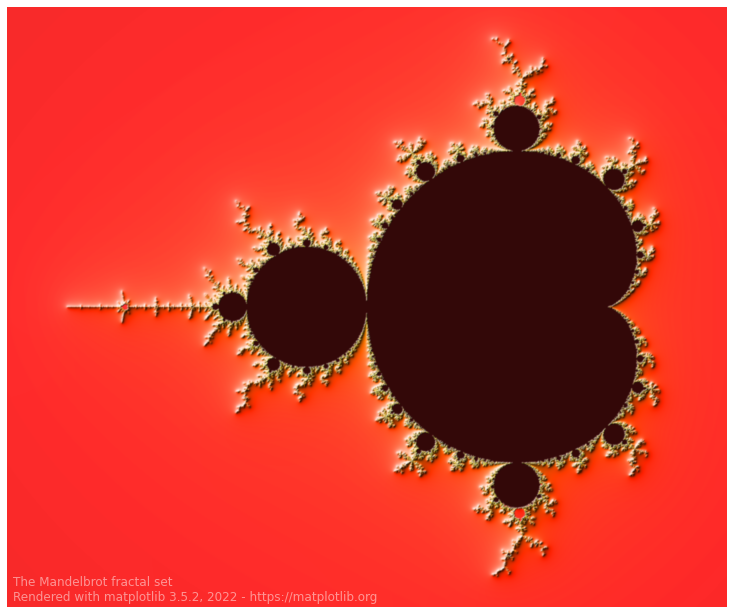

In [5]:
import numpy as np


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn).astype(np.float32)
    Y = np.linspace(ymin, ymax, yn).astype(np.float32)
    C = X + Y[:, None] * 1j
    N = np.zeros_like(C, dtype=int)
    Z = np.zeros_like(C)
    for n in range(maxiter):
        I = abs(Z) < horizon
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.25, +0.75, 3000 // 2
    ymin, ymax, yn = -1.25, +1.25, 2500 // 2
    maxiter = 200
    horizon = 2.0 ** 40
    log_horizon = np.log2(np.log(horizon))
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # Normalized recount as explained in:
    # https://linas.org/art-gallery/escape/smooth.html
    # https://web.archive.org/web/20160331171238/https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift?lang=en

    # This line will generate warnings for null values but it is faster to
    # process them afterwards using the nan_to_num
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 - np.log2(np.log(abs(Z))) + log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    ax.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    # Some advertisement for matplotlib
    year = time.strftime("%Y")
    text = ("The Mandelbrot fractal set\n"
            "Rendered with matplotlib %s, %s - https://matplotlib.org"
            % (matplotlib.__version__, year))
    ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()

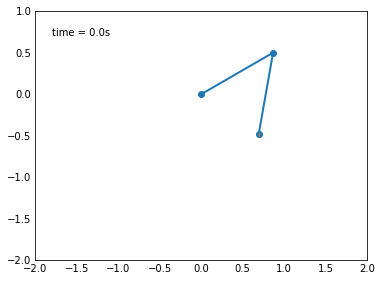

In [66]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from collections import deque

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
L = L1 + L2  # maximal length of the combined pendulum
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
t_stop = 5  # how many seconds to simulate
history_len = 500  # how many trajectory points to display


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * sin(delta) * cos(delta)
                + M2 * G * sin(state[2]) * cos(delta)
                + M2 * L2 * state[3] * state[3] * sin(delta)
                - (M1+M2) * G * sin(state[0]))
               / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * sin(delta) * cos(delta)
                + (M1+M2) * G * sin(state[0]) * cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * sin(delta)
                - (M1+M2) * G * sin(state[2]))
               / den2)

    return dydx

# create a time array from 0..t_stop sampled at 0.02 second steps
dt = 0.02
t = np.arange(0, t_stop, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-L, L), ylim=(-L, 1.))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    if i == 0:
        history_x.clear()
        history_y.clear()

    history_x.appendleft(thisx[2])
    history_y.appendleft(thisy[2])

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    return line, trace, time_text


ani = animation.FuncAnimation(
    fig, animate, len(y), interval=dt*1000, blit=True)
plt.show()

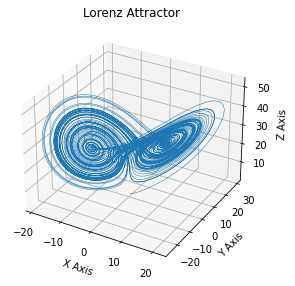

In [67]:
import numpy as np
import matplotlib.pyplot as plt


def lorenz(x, y, z, s=10, r=28, b=2.667):
    """
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    """
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

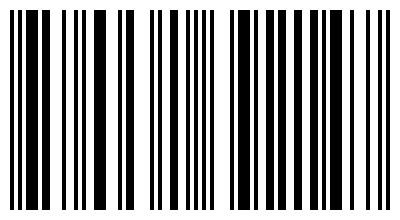

In [68]:
import matplotlib.pyplot as plt
import numpy as np


code = np.array([
    1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
    0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
    1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
    1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

pixel_per_bar = 4
dpi = 100

fig = plt.figure(figsize=(len(code) * pixel_per_bar / dpi, 2), dpi=dpi)
ax = fig.add_axes([0, 0, 1, 1])  # span the whole figure
ax.set_axis_off()
ax.imshow(code.reshape(1, -1), cmap='binary', aspect='auto',
          interpolation='nearest')
plt.show()

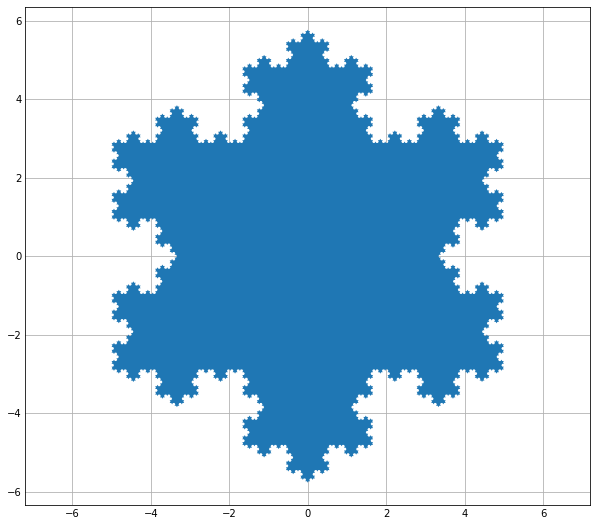

In [71]:
import numpy as np
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=5)
# print(x, y)
plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()